In [174]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/berlin-airbnb-data/reviews_summary.csv
/kaggle/input/berlin-airbnb-data/neighbourhoods.csv
/kaggle/input/berlin-airbnb-data/listings.csv
/kaggle/input/berlin-airbnb-data/calendar_summary.csv
/kaggle/input/berlin-airbnb-data/listings_summary.csv
/kaggle/input/berlin-airbnb-data/reviews.csv


In [175]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [176]:
#load data
data = pd.read_csv('../input/berlin-airbnb-data/listings_summary.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


# Missing Values and Data Cleaning

In [177]:
#NaN count and NaN%
round(data.isnull().sum()/len(data),3)

id                                  0.000
listing_url                         0.000
scrape_id                           0.000
last_scraped                        0.000
name                                0.003
                                    ...  
cancellation_policy                 0.000
require_guest_profile_picture       0.000
require_guest_phone_verification    0.000
calculated_host_listings_count      0.000
reviews_per_month                   0.174
Length: 96, dtype: float64

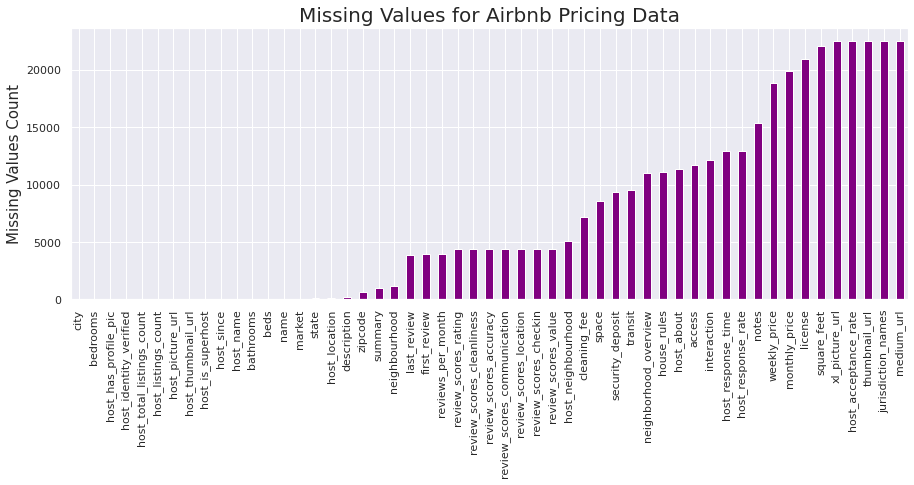

In [178]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(15,5))
    missing = data.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing.plot.bar(color='purple')
    plt.title("Missing Values for Airbnb Pricing Data", fontsize=20)
    plt.ylabel("Missing Values Count", fontsize=15)

In [179]:
#drop columns
data.drop(['host_id','latitude','longitude','host_total_listings_count','minimum_nights','maximum_nights','neighbourhood_cleansed','host_since','host_has_profile_pic','city','host_listings_count','is_business_travel_ready','has_availability','state','country_code','street','zipcode','host_response_time','host_response_rate','host_neighbourhood','experiences_offered','first_review','last_review','calendar_updated','is_location_exact','country','smart_location','market','host_location','host_verifications','review_scores_accuracy','host_name','review_scores_cleanliness','listing_url','scrape_id','description','transit','access','interaction','house_rules','last_scraped','summary','space','neighborhood_overview','availability_30','availability_60','availability_90','availability_365','calendar_last_scraped','jurisdiction_names','notes','thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_about','host_thumbnail_url','host_picture_url','name','license','square_feet','weekly_price','monthly_price','neighbourhood','host_acceptance_rate','reviews_per_month','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','requires_license','calculated_host_listings_count'], axis=1, inplace=True)

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   host_is_superhost                 22526 non-null  object 
 2   host_identity_verified            22526 non-null  object 
 3   neighbourhood_group_cleansed      22552 non-null  object 
 4   property_type                     22552 non-null  object 
 5   room_type                         22552 non-null  object 
 6   accommodates                      22552 non-null  int64  
 7   bathrooms                         22520 non-null  float64
 8   bedrooms                          22534 non-null  float64
 9   beds                              22512 non-null  float64
 10  bed_type                          22552 non-null  object 
 11  amenities                         22552 non-null  object 
 12  pric

Let's convert our variables with dollar sign amounts

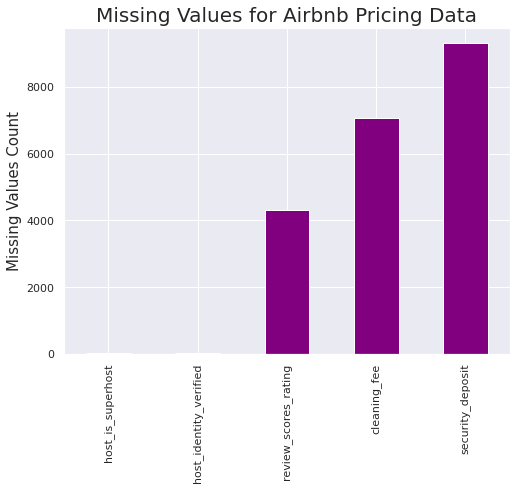

In [211]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(8,6))
    missing = data.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing.plot.bar(color='purple')
    plt.title("Missing Values for Airbnb Pricing Data", fontsize=20)
    plt.ylabel("Missing Values Count", fontsize=15)

In [181]:
#convert price data type 
data.price = data.price.str.replace('$', '').str.replace(',', '').astype(float)
#convert cleaning fee data type
data.cleaning_fee = data.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
#convert security deposit data type
data.security_deposit = data.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)
#convert extra people data type
data.extra_people = data.extra_people.str.replace('$', '').str.replace(',', '').astype(float)

In [182]:
data.bedrooms = data.bedrooms.astype(str)
data.beds = data.beds.astype(str)
data.bathrooms = data.bathrooms.astype(str)
data.guests_included = data.guests_included.astype(str)
data.extra_people = data.extra_people.astype(str)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   host_is_superhost                 22526 non-null  object 
 2   host_identity_verified            22526 non-null  object 
 3   neighbourhood_group_cleansed      22552 non-null  object 
 4   property_type                     22552 non-null  object 
 5   room_type                         22552 non-null  object 
 6   accommodates                      22552 non-null  int64  
 7   bathrooms                         22552 non-null  object 
 8   bedrooms                          22552 non-null  object 
 9   beds                              22552 non-null  object 
 10  bed_type                          22552 non-null  object 
 11  amenities                         22552 non-null  object 
 12  pric

Numerical Variables

In [184]:
numerical = [var for var in data.columns if data[var].dtype != 'object']

numerical

['id',
 'accommodates',
 'price',
 'security_deposit',
 'cleaning_fee',
 'number_of_reviews',
 'review_scores_rating']

In [185]:
#check for outliers
data[numerical].describe()

,id,accommodates,price,security_deposit,cleaning_fee,number_of_reviews,review_scores_rating
count,2.255200e+04,22552.000000,22552.000000,13191.000000,15406.000000,22552.000000,18163.000000
mean,1.571560e+07,2.637460,67.143668,202.225078,26.721018,17.840679,94.413863
std,8.552069e+06,1.510548,220.266210,375.858740,30.588015,36.769624,7.639644
min,2.015000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,8.065954e+06,2.000000,30.000000,0.000000,10.000000,1.000000,92.000000
50%,1.686638e+07,2.000000,45.000000,100.000000,20.000000,5.000000,97.000000
75%,2.258393e+07,3.000000,70.000000,250.000000,35.000000,16.000000,100.000000
max,2.986735e+07,16.000000,9000.000000,4280.000000,2000.000000,498.000000,100.000000


Categorical Variables

In [186]:
categorical = [var for var in data.columns if data[var].dtype == 'object']

categorical

['host_is_superhost',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'guests_included',
 'extra_people',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

# Exploratory Data Analysis

- What are the median price and distribution of prices by neighborhood? By room_type? By property_type?
- How do prices vary with different ammenities? We will need to do some feature engineering for this variable to extract useful information
- What are the distributions of the numerical variables? Any log transformations needed?
- Distributions of categorical variables


Text(0.5, 1.0, 'Feature Correlations Heatmap')

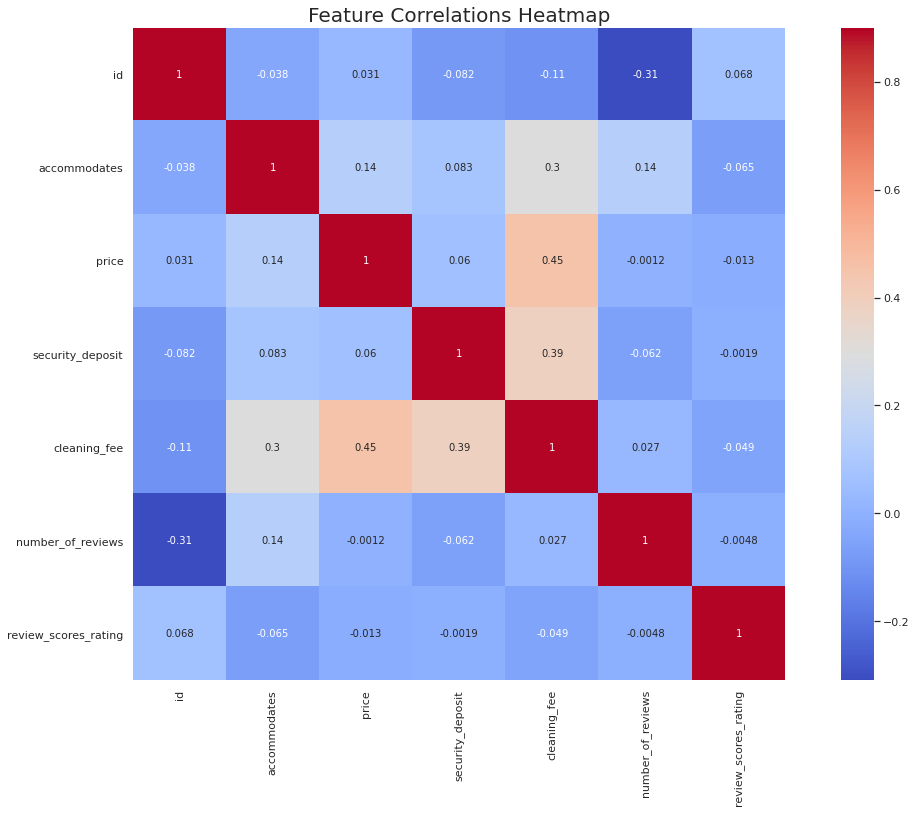

In [187]:
#correlation matrix

corr = data.corr()
f, ax = plt.subplots(figsize= (20,12))
sns.heatmap(corr, vmax=0.9, square=True, cmap='coolwarm', annot=True)
plt.title("Feature Correlations Heatmap", fontsize=20)

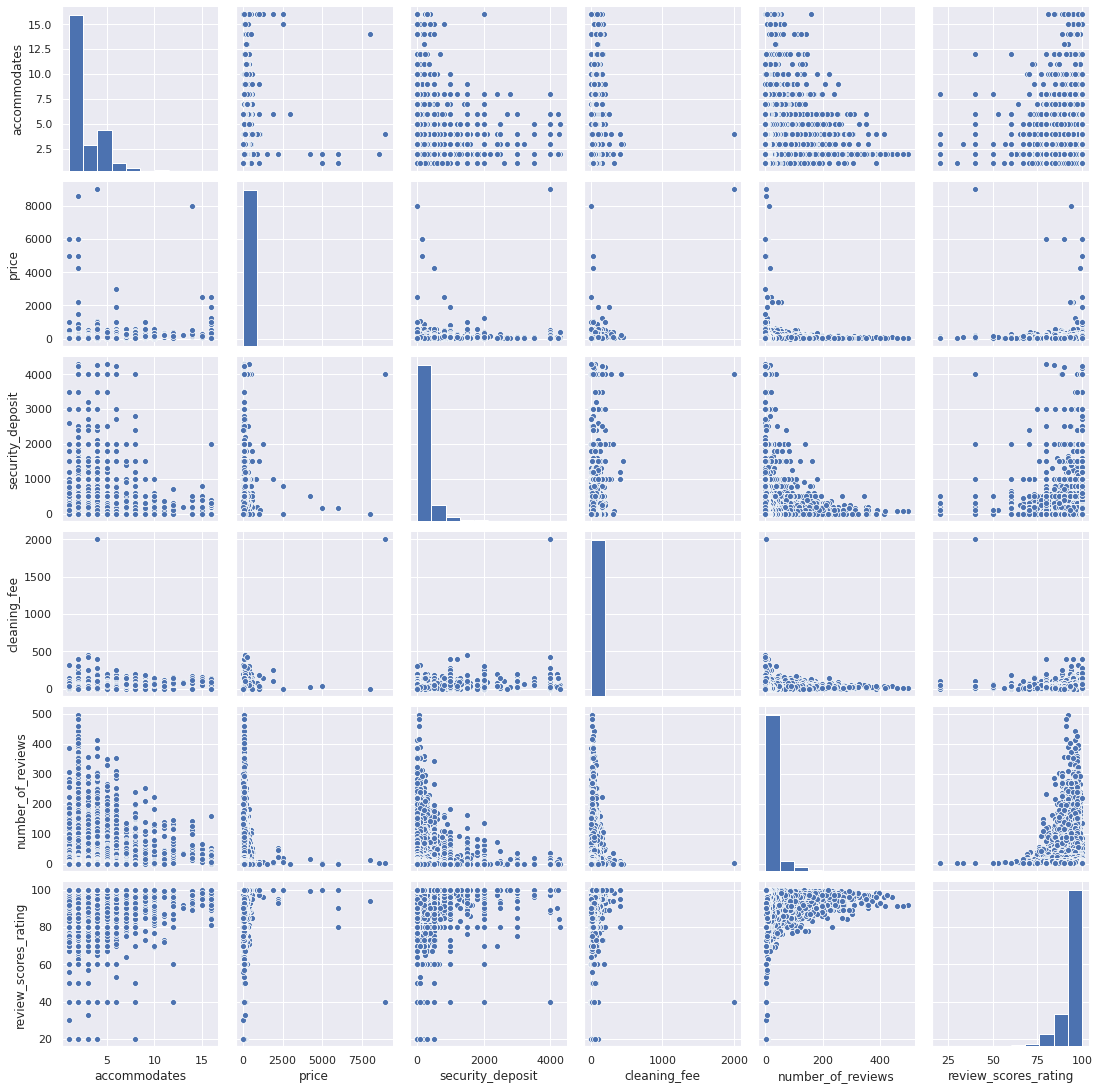

In [188]:
#numerical variables

sns.set()
cols = data[numerical].drop(['id'],axis=1)
sns.pairplot(cols, size=2.5)
plt.show()

Cleaning Fee, Security Deposit and Review_scores_rating all have significant missing variables. Before feeding into our model we will either need to drop these rows or impute with a mean or mode. Alternatively a missing value for a security deposit could mean that the host doesn't charge one, so we will need to use our judgment or additional business context to make a decision. 

# Outliers 

Let's identify outliers in the target variable (price) 

In [190]:
data.price.describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [191]:
data[(data['price'] == 0)]
data[(data['price'] > 300)]
data.price.quantile(0.99)

print(data.shape)
data.drop(data[data.price == 0].index, axis=0, inplace=True)
print(data.shape)
data.drop(data[data.price > 300].index, axis=0, inplace=True)
print(data.shape)

(22552, 23)
(22544, 23)
(22379, 23)


In [192]:
data.head()

,id,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2015,t,t,Mitte,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,...,200.0,30.0,1,28.0,118,93.0,f,strict_14_with_grace_period,f,f
1,2695,f,t,Pankow,Apartment,Private room,2,1.0,1.0,1.0,...,0.0,0.0,1,0.0,6,100.0,f,flexible,f,f
2,3176,f,t,Pankow,Apartment,Entire home/apt,4,1.0,1.0,2.0,...,200.0,50.0,2,20.0,143,92.0,t,strict_14_with_grace_period,f,f
3,3309,f,t,Tempelhof - Schöneberg,Apartment,Private room,2,1.0,1.0,1.0,...,250.0,30.0,1,18.0,25,88.0,f,strict_14_with_grace_period,f,f
4,7071,t,t,Pankow,Apartment,Private room,2,1.0,1.0,2.0,...,0.0,0.0,1,24.0,197,96.0,f,moderate,f,f


In [195]:
data[numerical].describe

<bound method NDFrame.describe of              id  accommodates  price  security_deposit  cleaning_fee  \
0          2015             3   60.0             200.0          30.0   
1          2695             2   17.0               0.0           0.0   
2          3176             4   90.0             200.0          50.0   
3          3309             2   26.0             250.0          30.0   
4          7071             2   42.0               0.0           0.0   
...         ...           ...    ...               ...           ...   
22547  29856708             2   60.0               NaN           NaN   
22548  29857108             6   20.0               0.0           0.0   
22549  29864272             2   85.0               NaN           NaN   
22550  29866805             2   99.0               NaN           NaN   
22551  29867352             2   45.0               NaN           NaN   

       number_of_reviews  review_scores_rating  
0                    118                  93.0  
1  

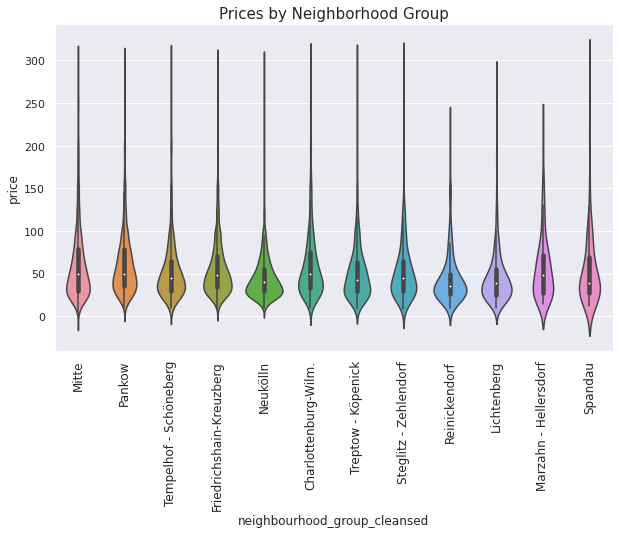

In [196]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize = (10,6))
    ax = sns.violinplot(x="neighbourhood_group_cleansed", y="price", data=data)
    plt.xticks(rotation='vertical',fontsize=12)
    plt.title("Prices by Neighborhood Group",fontsize=15)

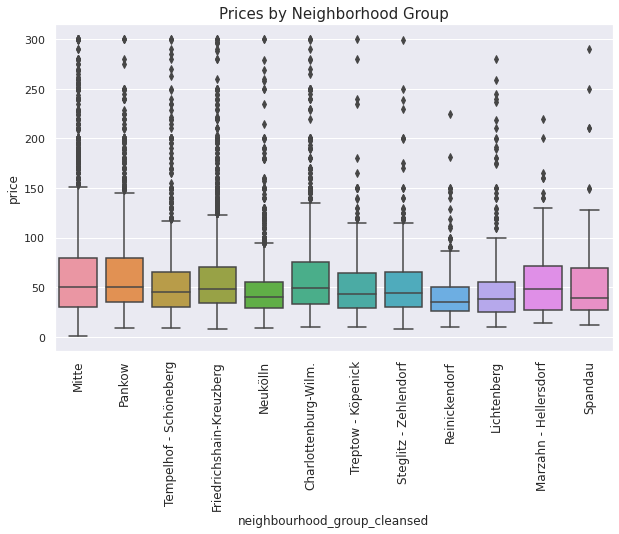

In [197]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize = (10,6))
    ax = sns.boxplot(x="neighbourhood_group_cleansed", y="price", data=data)
    plt.xticks(rotation='vertical',fontsize=12)
    plt.title("Prices by Neighborhood Group",fontsize=15)

Median Price by Neighborhood

Text(0.5, 1.0, 'Median Price by Neighborhood')

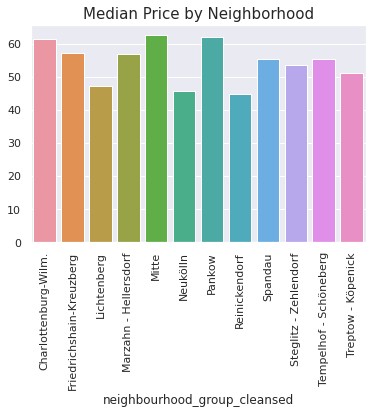

In [198]:
median_price = data.groupby("neighbourhood_group_cleansed")["price"].mean()
median_price
sns.barplot(x=median_price.index, y=median_price.values)
plt.xticks(rotation='vertical')
plt.title("Median Price by Neighborhood", fontsize=15)

Price vs Rating

Text(0.5, 1.0, 'Price v Rating')

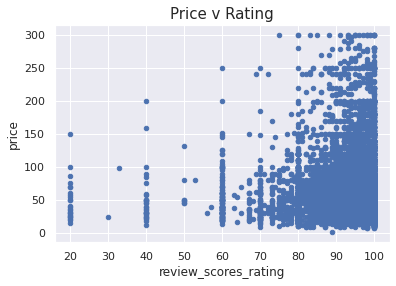

In [199]:
x = pd.concat([data['price'],data['review_scores_rating']], axis=1)
x.plot.scatter(x='review_scores_rating',y='price')
plt.title("Price v Rating", fontsize=15)

Text(0.5, 1.0, 'Bedrooms v Price')

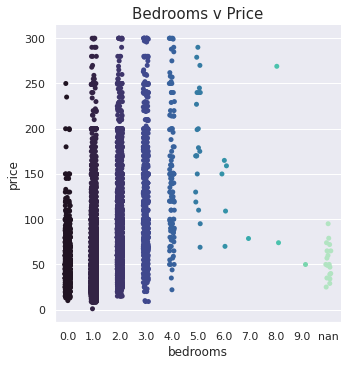

In [200]:
sns.catplot(x='bedrooms',y='price',palette ='mako',data=data)
plt.title('Bedrooms v Price',fontsize=15)

Text(0.5, 1.0, 'Bathrooms v Price')

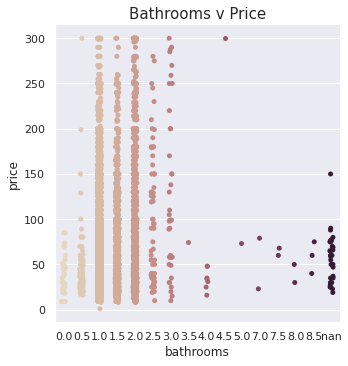

In [201]:
sns.catplot(x='bathrooms',y='price',palette ="ch:.25",data=data)
plt.title('Bathrooms v Price',fontsize=15)

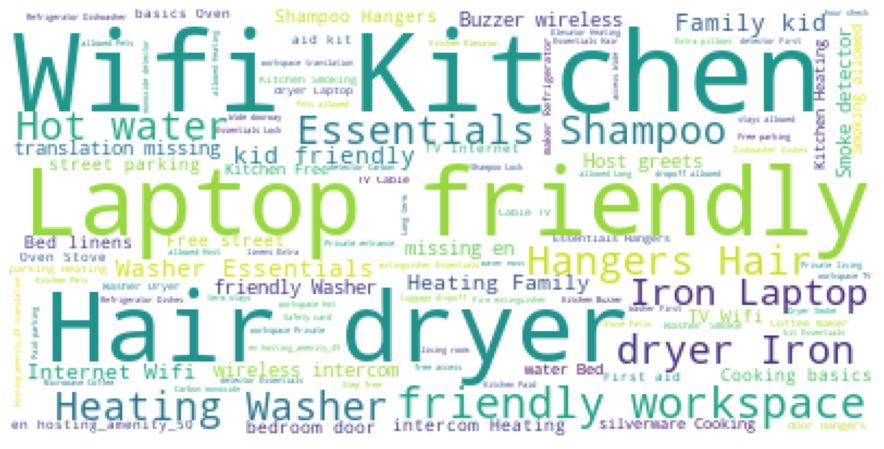

In [202]:
from wordcloud import WordCloud

plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White').generate(" ".join(data["amenities"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

# Feature Engineering

In [203]:
data.amenities.head()

0    {TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Famil...
1    {Wifi,Kitchen,Elevator,Heating,Washer,Essentia...
2    {Internet,Wifi,Kitchen,"Buzzer/wireless interc...
3    {Internet,Wifi,"Pets allowed","Pets live on th...
4    {Wifi,Heating,"Family/kid friendly",Essentials...
Name: amenities, dtype: object

In [204]:
def clean_text(amenities):
    amenities = str(amenities).lower()
    amenities = amenities.replace(","," ")
    amenities = amenities.replace('"','')
    return amenities

In [205]:
data['amenities'] = data['amenities'].apply(lambda x:clean_text(x))
data.amenities

0        {tv cable tv wifi kitchen gym heating family/k...
1        {wifi kitchen elevator heating washer essentia...
2        {internet wifi kitchen buzzer/wireless interco...
3        {internet wifi pets allowed pets live on this ...
4        {wifi heating family/kid friendly essentials s...
                               ...                        
22547    {wifi smoking allowed heating essentials shamp...
22548    {tv wifi kitchen free parking on premises free...
22549    {wifi kitchen heating washer fire extinguisher...
22550    {wifi paid parking off premises doorman elevat...
22551    {wifi air conditioning kitchen breakfast heati...
Name: amenities, Length: 22379, dtype: object

In [206]:
data['wifi'] = data['amenities'].str.contains('wifi')
data['tv'] = data['amenities'].str.contains('tv')
data['laptop'] = data['amenities'].str.contains('laptop')
data['kitchen'] = data['amenities'].str.contains('kitchen')
data['heating'] = data['amenities'].str.contains('heating')
data['washer'] = data['amenities'].str.contains('washer')
data['dryer'] = data['amenities'].str.contains('dryer')

In [207]:
amen = data[['wifi','tv','laptop','kitchen','heating','washer','dryer']]

def amen_median():
    for var in amen:
        print(data[[var,'price']].groupby([var]).mean())

amen_median()

           price
wifi            
False  52.823992
True   56.923603
           price
tv              
False  46.807639
True   68.752716
            price
laptop           
False   52.245769
True    59.253782
            price
kitchen          
False    50.61623
True     57.07893
             price
heating           
False    48.212670
True     57.274213
            price
washer           
False   57.188338
True    56.649311
           price
dryer           
False  47.432317
True   60.789352


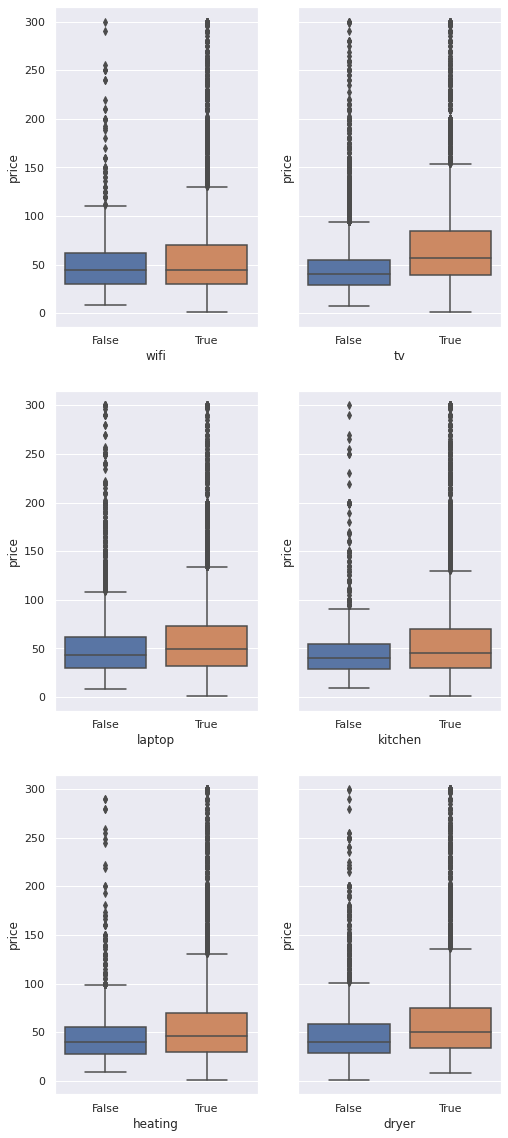

In [208]:
fig, axes = plt.subplots(3,2, figsize= (8,20),sharey=True)

sns.boxplot(x='wifi',y='price',data=data,ax=axes[0,0])
sns.boxplot(x='tv',y='price',data=data,ax=axes[0,1])
sns.boxplot(x='laptop',y='price',data=data,ax=axes[1,0])
sns.boxplot(x='kitchen',y='price',data=data,ax=axes[1,1])
sns.boxplot(x='heating',y='price',data=data,ax=axes[2,0])
sns.boxplot(x='dryer',y='price',data=data,ax=axes[2,1])

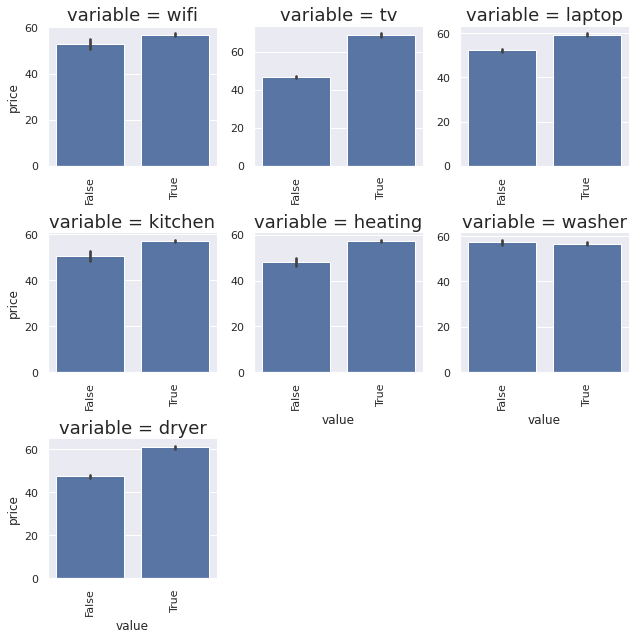

In [209]:
f = pd.melt(data, id_vars=['price'], value_vars=amen)
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=3, height=1)
g = g.map(sns.barplot, "value","price")
g.set_xticklabels(rotation=90) 
g.fig.tight_layout()
g.set_titles(size=18)